# Магистратура "Аналитика больших данных". Введение в машинное обучение

## НИУ ВШЭ, 2024-25 учебный год

# Домашнее задание 1. Регрессия

Задание выполнил(а): Ломов Никита

В этом домашнем задании вам будет необходимо обучить модель регрессии для предсказания стоимости автомобилей (10 основных баллов + 2.5 бонусных)

> Оценка за домашнее задание = $min(\text{ваш балл}, 12.5)$

## Общая информация

__Внимание!__  

* Домашнее задание выполняется самостоятельно
* Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов
* Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

## Импорт библиотек, установка констант

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [ ]:
CARS_TRAIN = 'https://github.com/evgpat/datasets/raw/refs/heads/main/cars_train.csv'
CARS_TEST = 'https://github.com/evgpat/datasets/raw/refs/heads/main/cars_test.csv'

In [ ]:
RANDOM_STATE = 42

In [ ]:
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

## Задание 0

Для чего фиксируем сиды в ноутбуке?

Фиксация сида в ноутбуке используется для гарантии воспроизводимости результатов случайной разбивкой на train/test
Если этого не делать, каждый запуск ноутбука может приводить к разным результатам, что мешает:
отладке;
сравнительному анализу моделей;
проверке чужого кода;
повторению экспериментов в научной работе.



## Часть 1 | EDA




Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (3 балла)
- Визуализации признаков и их анализ (1 балл+0.5)

Всего можно набрать 4 основных балла и 0.5 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (3 балла)**

In [ ]:
df_train = pd.read_csv(CARS_TRAIN)
df_test = pd.read_csv(CARS_TEST)

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.5 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски. Выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд

In [ ]:
# !pip install ydata-profiling
# from ydata_profiling import ProfileReport

def edafunc(df):

  missing_cols = df_train.isna().sum().sort_values(ascending=False)
  missing_cols_name = df.columns[df.isnull().any()]
  duplicates = df_train.duplicated().sum()

  print(f'Пропущенные значения: \n{missing_cols}')
  print(f'\nКолонки с пропусками: \n{missing_cols_name}')
  print(f'\nДубликаты: {duplicates}')

  ProfileReport(df, title="Отчет по данным", explorative=True).to_notebook_iframe()


In [ ]:
edafunc(df_train) # Трейн датасет

In [ ]:
edafunc(df_test) # Тест датасет"

# Общие выводы:
## Сравнение общих характеристик данных:
- Оба датасета имеют похожую картина по пропущенным значениям - около 1 % для каждого датасета, что в целом говорит о небольшом уровне потерь данных.
- Оба датасета имеют дубликаты, что придется учесть в будущем (7.0 % и 3.3 % соотвественно)

## Похожие распределения по переменным:
- Целевая переменная selling_price: обе выборки имеют схожие диапазоны целевой переменной, хотя в трейн датасете имеются сильные выбросы.
- Категориальные переменные fuel, seller_type, transmission, owner: обе выборки имеют схожее распределения значений категориальных переменных.

## Корреляции:
- Матрица корреляций выглядит одинаковой для двух датасетов. Корреляция между selling_price с km_driven, year как в трейн, так и в тестовом наборе данных достаточно высокая, что указывает на сильную зависимость этих переменных от стоимости автомобилей. Также есть корреляций между selling_price и transmission, что в целом логично, т.к. машины на автоматической коробке передач скорее всего стоят дороже, чем на механической, другие категориальные переменные не имеют / имеют слабую корреляцию с целевой переменной.

### **Задание 2 (0.4 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [ ]:
df_train.describe() # Числовые Трейн

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
 df_test.describe()  # Числовые Тест

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [ ]:
df_train.select_dtypes(include='object').describe() # Категориальные Трейн

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [ ]:
df_test.select_dtypes(include='object').describe() # Категориальные Тест

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


In [ ]:
# Средние и медианы для числовых столбцов
means_train = df_train.select_dtypes(include='number').mean()
medians_train = df_train.select_dtypes(include='number').median()

means_test = df_test.select_dtypes(include='number').mean()
medians_test = df_test.select_dtypes(include='number').median()

asymmetry_train = (means_train - medians_train).abs()
asymmetry_test = (means_test - medians_test).abs()

print("Train - разница между средним и медианой:\n", asymmetry_train.sort_values(ascending=False))
print("\nTest - разница между средним и медианой:\n", asymmetry_test.sort_values(ascending=False))

Train - разница между средним и медианой:
 selling_price    189515.197171
km_driven          9584.615517
year                  1.181597
seats                 0.419008
dtype: float64

Test - разница между средним и медианой:
 selling_price    182902.042000
km_driven          9893.341000
seats                 0.410805
year                  0.319000
dtype: float64


# Выводы:
- У целевой переменной selling_price очень высокая разница между средним и медианой распределение сильно правостороннее, что мы видели на прошлом этапе. Причём ситуация похожа в train и test, что хорошо.
- km_driven также имеет довольно большую асимметрия train и test согласованы это плюс.
- year 1.18 в train против 0.32 в test
В train средний год заметно дальше от медианы, чем в test. Это говорит о том, что в трейне есть больше старых машин, которые тянут среднее вниз. Это потенциальное смещение распределения между train и test по возрасту авто, что плохо повлияет на обучение модели.
- seats незначительная асимметрия, можно считать пренебрежимо малой. Данные между train и test согласованы.

### **Задание 3 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько?
- [ ] Отобразите такие объекты
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков

In [ ]:
feature = df_train.drop(columns='selling_price').duplicated()

print(f'Количество объектов с одинаковым признаковым описанием: {feature.sum()}')

Количество объектов с одинаковым признаковым описанием: 1159


In [ ]:
df_train[feature].head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
338,Skoda Rapid 1.6 MPI AT Elegance,2016,645000,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
357,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
358,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
359,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0


In [ ]:
df_train = df_train.drop_duplicates(subset=df_train.columns\
                                    .difference(['selling_price']), keep='first')

In [ ]:
df_train.reset_index(drop=True, inplace=True)

In [ ]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.7 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [ ]:
import pandas as pd
import numpy as np
import re

def extract_float(s): # Для того чтобы убрать единицы измерений + должно корректно работать с пустыми строками по типу ''
    try:
        return float(str(s).split()[0])
    except:
        return np.nan


def extract_torque_components(value): # тут спросил у чата GPT
    try:
        # Используем регулярку: ищем число перед Nm и число после @
        match = re.search(r"([0-9.]+)\s*Nm(?: at|@)?\s*([0-9\-]+)?", str(value))
        if match:
            torque = float(match.group(1))
            rpm = match.group(2)
            rpm = float(rpm.split('-')[0]) if rpm else np.nan
            return torque, rpm
    except:
        return np.nan, np.nan
    return np.nan, np.nan


for df in [df_train, df_test]:

    df["mileage"] = df["mileage"].apply(extract_float)
    df["engine"] = df["engine"].apply(extract_float)
    df["max_power"] = df["max_power"].apply(extract_float)

    torque_components = df["torque"].apply(extract_torque_components)
    df["torque_value"] = torque_components.apply(lambda x: x[0])
    df["torque_rpm"] = torque_components.apply(lambda x: x[1])

    # Удалим исходный текстовый torque, он больше не нужен
    df.drop(columns=["torque"], inplace=True)


### **Задание 5 (0.4 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [ ]:
median = df_train.median(numeric_only=True)

df_train.fillna(median, inplace=True)
df_test.fillna(median, inplace=True)

In [ ]:
df_train.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [ ]:
df_test.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


<Axes: >

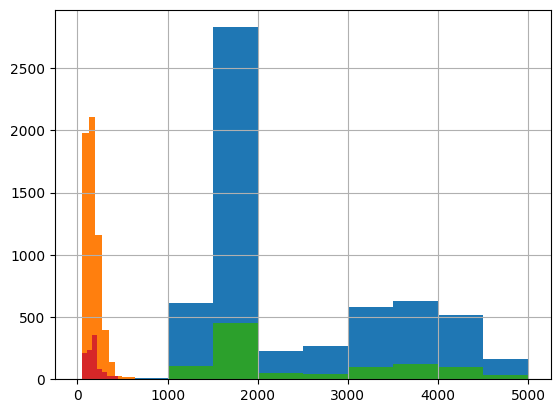

In [ ]:
df_train.torque_rpm.hist()
df_train.torque_value.hist()
df_test.torque_rpm.hist()
df_test.torque_value.hist() # Не запаривался над визуализацией нужно было кинуть быстрый взгляд, чтобы сделать вывод по тому, можно ли было использовать среднее

# Ответы на вопросы:
- Почему использовать медиану, а не среднее?
Медиана лучше при наличии выбросов, потому что среднее сильно смещается в сторону экстремальных значений. Среднее в данном случае было бы использовать достаточно глупо, так как в заполняемых полях присутствуют выбросы и ассиметрия распределений.

- Мы обучаем модель на train, поэтому любая статистика, даже при заполнении пропусков, должна быть получена из train, иначе произойдёт так называемая утечка данных.

### **Задание 6 (0.3 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [ ]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

# Ответ:
- seats имеет дискретное и небольшое множество значений, поскольку кол-во мест редко превышает 5, нет экстремальных значений.

### **Задание 7 (0.2 балла)**

Снова вызовите метод `describe` и проанализируйте статистики.

**Ответьте на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [ ]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_value,torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,5.426712,172.331656,2585.819521
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,0.982344,81.326421,1054.153388
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000,51.000000,1.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000,113.000000,1750.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,5.000000,170.000000,2000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000,200.000000,3500.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,789.000000,5000.000000


In [ ]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_value,torque_rpm
count,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.33881,1454.87600,90.841670,5.403000,174.845500,2640.064000
std,4.012149,7.585539e+05,48486.218662,3.95175,521.99574,34.893389,0.912921,86.743058,1084.001394
min,1995.000000,3.100000e+04,1303.000000,0.00000,624.00000,34.200000,4.000000,48.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.55000,1197.00000,69.000000,5.000000,111.950000,1750.000000
50%,2014.000000,4.349990e+05,61500.000000,19.37000,1248.00000,82.425000,5.000000,170.000000,2000.000000
75%,2017.000000,6.700000e+05,100000.000000,22.30000,1582.00000,102.000000,5.000000,200.000000,3500.000000
max,2020.000000,6.000000e+06,375000.000000,32.26000,3604.00000,280.000000,9.000000,620.000000,5000.000000


# Вывод:
- В нашем случае сдвигов почти не произошло, распределения остались близкими к исходным. Это могло возникнуть, если бы процент пропусков был выше и мы не заполняли их медианой, а также если бы для теста и для трейна брали соотвественные медианы.

## **Визуализации и корреляция (1 балл + 0.5)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте `pairplot` по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [ ]:
# your code here
...

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [ ]:
# your code here

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`

### **Дополнительные визуализации (бонус 0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [ ]:
# your code here

# **Часть 2 (4 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 4 основных баллов;

### **Задание 10 (0.3 балла)**

Создайте копии тренировочного и тестового датафреймов, в которых останутся только вещественные признаки (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [ ]:
y_train = df_train.copy()['selling_price']
X_train = df_train.copy().drop(columns=df_train.select_dtypes(include='object').columns).drop(columns=['selling_price'])

In [ ]:
assert X_train.shape == (5840, 8)

In [ ]:
y_test = df_test.copy()['selling_price']
X_test = df_test.copy().drop(columns=df_train.select_dtypes(include='object').columns).drop(columns=['selling_price'])

In [ ]:
assert X_test.shape == (1000, 8)

### **Задание 11 (1 балл)**

Построим нашу первую модель!
- [ ] Найдите паремтры модели с помощью аналитического решения уравнения $\theta = (X^T X)^{-1} X^T y$. *Параметры ищите только по датасету `train`.* Не забудьте добавить столбец из единиц в качестве свободного члена!
- [ ] Посчтитайте $R^2$ и $MSE$ для трейна и для теста (с помощью готовых решений из sklearn).
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error as MSE


# Добавление столбца единиц для свободного члена (смещения)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Вычисление коэффициентов линейной регрессии методом наименьших квадратов
# Формула: θ = (X^T * X)^(-1) * X^T * y
theta_best = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

# Вывод найденных коэффициентов
print("Оцененные коэффициенты (θ):", theta_best.ravel())

Оцененные коэффициенты (θ): [-7.96424419e+07  3.94772025e+04 -8.06448746e-01  1.58139711e+02
  4.53004489e+01  9.06845663e+03 -3.18702732e+04  6.85680188e+02
 -2.69536405e+01]


In [ ]:
# Подсчет предсказаний
y_predict_train = X_train_b @ theta_best
y_predict_test = X_test_b @ theta_best

In [ ]:
# Подсчет метрик модели

r2_train = r2_score(y_train, y_predict_train)
r2_test = r2_score(y_test, y_predict_test)

mse_train = MSE(y_train, y_predict_train)
mse_test = MSE(y_test, y_predict_test)

print("Train R²:", r2_train)
print("Test R²:", r2_test)
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train R²: 0.5996165438842168
Test R²: 0.5983501306369272
Train MSE: 114765248567.01588
Test MSE: 230879814278.34503


- Коэффициент детерминации показывает почти индентичные значения на трейне и тесте, что указываект на хорошое согласование модели. Однако, модель объясняет около 60 % дисперсии цен.
- Test MSE гораздо больше Train MSE, что говорит нам о крупных ошибках на новых данных.

### **Задание 12. (0.3 балла)**
Теперь сравним результаты с готовым решением из библиотеки sklearn.

- [ ] Обучите классическую линейную регрессию с дефолтными параметрами c помощью LinearRegression.
- [ ] Посчтитайте $R^2$ и $MSE$ для трейна и для теста.


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_train_lr = lin_reg.predict(X_train)
y_pred_test_lr  = lin_reg.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr  = r2_score(y_test,  y_pred_test_lr)
mse_train_lr = MSE(y_train, y_pred_train_lr)
mse_test_lr  = MSE(y_test,  y_pred_test_lr)

print("Train R²:", r2_train_lr)
print("Test R²:", r2_test_lr)
print("Train MSE:", mse_train_lr)
print("Test MSE:", mse_test_lr)

# Видим те же метрики

Train R²: 0.5996165438842167
Test R²: 0.5983501306437577
Train MSE: 114765248567.01593
Test MSE: 230879814274.41867


### **Задание 13 (0.2 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте признаки в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,  columns=X_test.columns, index=X_test.index)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_train_lr = lin_reg.predict(X_train_scaled)
y_pred_test_lr  = lin_reg.predict(X_test_scaled)

r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr  = r2_score(y_test,  y_pred_test_lr)
mse_train_lr = MSE(y_train, y_pred_train_lr)
mse_test_lr  = MSE(y_test,  y_pred_test_lr)

print("Train R²:", r2_train_lr)
print("Test R²:", r2_test_lr)
print("Train MSE:", mse_train_lr)
print("Test MSE:", mse_test_lr)

Train R²: 0.599616543884218
Test R²: 0.5983501306437552
Train MSE: 114765248567.01553
Test MSE: 230879814274.4201


### **Задание 14 (0.2 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
coef = pd.Series(lin_reg.coef_, index=X_train_scaled.columns)
coef_abs = coef.abs().sort_values(ascending=False)
coef_abs

,0
max_power,286905.194411
year,161669.853697
torque_value,55759.141207
km_driven,48440.144873
seats,31304.889487
torque_rpm,28410.838656
engine,21998.860663
mileage,630.286674


### **Задание 15 (0.3 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=42)
lasso.fit(X_train_scaled, y_train)

y_pred_train_lasso = lasso.predict(X_train_scaled)
y_pred_test_lasso  = lasso.predict(X_test_scaled)

r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
r2_test_lasso  = r2_score(y_test,  y_pred_test_lasso)
mse_train_lasso = MSE(y_train, y_pred_train_lasso)
mse_test_lasso  = MSE(y_test,  y_pred_test_lasso)

print("Train R²:", r2_train_lasso)
print("Test R²:", r2_test_lasso)
print("Train MSE:", mse_train_lasso)
print("Test MSE:", mse_test_lasso)

Train R²: 0.5996165438473482
Test R²: 0.5983489851779112
Train MSE: 114765248577.58386
Test MSE: 230880472720.8967


### **Задание 16. Реализация градиентного бустинга (1.2 балла)**

Теперь попробуем применить метод градиентного спуска для решения уравнения линейной регресии. Вам предстоит дополнить код так, чтобы получился алгоритм полного градиентного спуска. Затем, с помощью полученной функции предстоит снова обучить модель на `train` данных и сделать два предсказания: для `train` и `test`.


**Ваша задача :**

- [ ] Добавить столбец из единиц к своему датасету
- [ ] Дополнить функцию градиентного спуска
- [ ] Применить полученную функцию к train датасету
- [ ] Сделать предсказания для `train` и `test`. Оценить предсказания с помощью $R^2$ и $MSE$.

In [ ]:
# Доработайте: добавьте столбец единиц к X
X_train_b = ...  # Ваш код здесь

# Функция градиентного спуска
def gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    """
    Реализация градиентного спуска для линейной регрессии.

    Параметры:
    X - матрица признаков с добавленным единичным столбцом
    y - вектор целевой переменной
    learning_rate - скорость обучения
    n_iterations - количество итераций

    Возвращает:
    theta - оцененные коэффициенты модели
    """
    m, n = X.shape  # Количество примеров (m) и количество признаков (n)
    theta = ...  # Инициализируйте theta случайными значениями

    for iteration in range(n_iterations):
        gradients = ...  # Рассчитайте градиент функции потерь (MSE)
        theta -= ...  # Обновите параметры

        if iteration % 100 == 0:
            mse = ...  # Вычислите MSE для отслеживания процесса
            print(f"Итерация {iteration}: MSE = {mse:.4f}")

    return theta

# Доработайте: вызовите функцию градиентного спуска
theta_gd = ...  # Ваш код здесь
print("Оцененные коэффициенты (градиентный спуск):", theta_gd.ravel())

In [ ]:
# Получите новые предсказания для train и test
y_pred_test_grad = ...  # Вычислите предсказания для test
y_pred_train_grad = ...  # Вычислите предсказания для train

# Посчитайте RMSE и R2
 ...  # Ваш код здесь

### Задание 17 (0.5 балла):

- [ ] Сделайте еще одно обучение модели для готового решения стохастического градиентного бустинга из sklearn
- [ ] Оцените результаты с помощью $R^2$ и $MSE$

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
# your code here

# **Часть 3 (1 балл) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 1 основной балл.



### **Задание 19 (0.2 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
# your code here

In [ ]:
assert X_train_cat.shape == (5840, 13)

In [ ]:
X_train_cat.describe(include='object')

### **Задание 20 (0.2 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Your answer here`

### **Задание 22 (0.4 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Обучите Ridge регрессию на новом датасете
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge

# your code here

# **Часть 4 - бонусная (2 балла) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# **Часть 4. | Бизнесовая (1 балл)**

### **Задание 23 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metrics(y_true, y_pred):
    # your code here

business_metrics(# your code here)

### **Задание 24 (0.5 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [ ]:
def your_business_metrics(y_true, y_pred):

business_metrics(# your code here)

# Заключительная часть

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Теперь можно отдохнуть и похвалить себя. Но пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой :)


Поделитесь впечатлениями о задании:
Не успел полностью погрузиться в задачу, так как слишком поздно начал, возможно доделаю в свободное время(

P.S Удачного кодинга!  
Пейте черничный латте, пишите красивый Python!!